# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [13]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

⭐Run the following code to read in the "cardio.csv" file.

In [2]:
df = pd.read_csv("cardio.csv", sep=";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.shape

(70000, 13)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

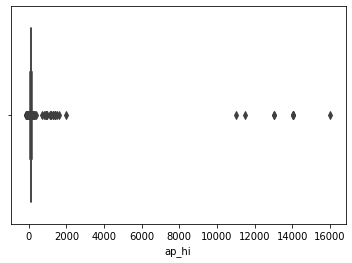

In [9]:
sns.boxplot(x= "ap_hi", data=df);

In [10]:
df= df[df.ap_hi < 250]
df= df[df.ap_hi > 0]

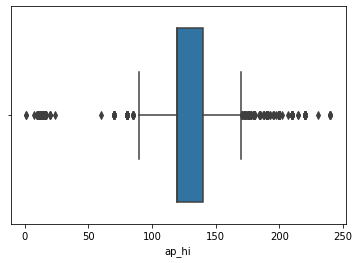

In [11]:
sns.boxplot(x= "ap_hi", data=df);

In [17]:
stats.iqr(df.ap_hi)

20.0

In [18]:
np.percentile(df.ap_hi, 75) + 1.5 * stats.iqr(df.ap_hi)

170.0

In [19]:
df= df[df.ap_hi < 170]
df= df[df.ap_hi > 90]

<AxesSubplot:xlabel='ap_lo'>

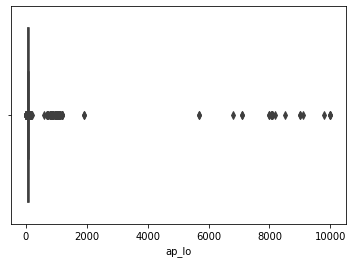

In [20]:
sns.boxplot(x= "ap_lo", data=df)

In [21]:
df= df[df.ap_lo < 110]
df= df[df.ap_lo > 60]

<AxesSubplot:xlabel='ap_lo'>

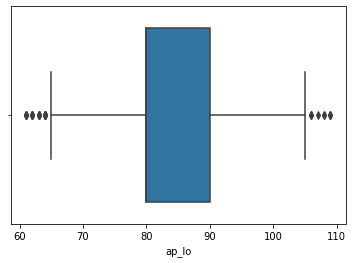

In [22]:
sns.boxplot(x= "ap_lo", data=df)

In [24]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000
mean,49979.559451,19488.099508,1.351928,164.466256,74.211244,126.346242,81.714838,1.362315,1.225115,0.087665,0.052934,0.803600,0.495927
std,28857.662001,2457.996448,0.477576,8.144080,14.082985,13.779643,7.639202,0.679101,0.572492,0.282809,0.223904,0.397278,0.499987
min,0.000000,10859.000000,1.000000,55.000000,11.000000,93.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24942.500000,17713.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50037.000000,19714.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74899.750000,21338.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,169.000000,109.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df = df.sample(500)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
56230,80229,18753,1,160,80.0,125,80,3,1,0,0,1,1
16434,23476,19767,1,169,67.0,120,70,1,3,0,0,0,1
42272,60397,19675,1,159,55.0,120,70,1,1,0,0,0,0
12917,18410,21432,2,181,78.0,120,80,3,1,0,0,1,0
30740,43945,19584,2,165,61.0,110,80,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,4304,20018,1,169,78.0,120,80,1,1,0,0,0,0
16125,23023,19147,2,167,62.0,120,80,1,1,0,0,1,1
61147,87292,15993,1,164,55.0,120,70,1,1,0,0,1,0
11481,16422,18130,1,168,83.0,110,90,3,3,0,0,1,1


In [28]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,47749.970000,19415.458000,1.358000,164.318000,73.890000,126.632000,81.738000,1.368000,1.188000,0.084000,0.070000,0.794000,0.492000
std,28963.633863,2522.231909,0.479892,8.302454,14.299575,13.903351,7.667786,0.682281,0.537805,0.277666,0.255403,0.404836,0.500437
min,141.000000,14293.000000,1.000000,120.000000,42.000000,100.000000,68.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,23205.250000,17717.250000,1.000000,159.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,47031.000000,19632.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,70993.250000,21279.250000,2.000000,169.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99713.000000,23616.000000,2.000000,197.000000,125.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [29]:
df.ap_hi.mean()

126.632

⭐What is the standard deviation for Systolic blood pressure?

In [30]:
df.ap_hi.std()

13.903351479579682

⭐What is the standard error of the mean for Systolic blood pressure?

In [31]:
df.ap_hi.sem()

0.6217767804682489

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [32]:
df.ap_hi.describe()

count    500.000000
mean     126.632000
std       13.903351
min      100.000000
25%      120.000000
50%      120.000000
75%      140.000000
max      160.000000
Name: ap_hi, dtype: float64

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [35]:
# güven aralığı hesaplaması
# 0.99 = alpha
# 499 = degress of fredom

stats.t.interval(0.99, 499, loc=df.ap_hi.mean(), scale= df.ap_hi.sem())

(125.02426078379513, 128.23973921620487)

In [36]:
stats.t.interval(0.95, 499, loc=df.ap_hi.mean(), scale= df.ap_hi.sem())

(125.41037688478035, 127.85362311521966)

In [37]:
# güven aralığı azaldıkça kapsadığı değerler de azalır

stats.t.interval(0.90, 499, loc=df.ap_hi.mean(), scale= df.ap_hi.sem())

(125.60736597027953, 127.65663402972048)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

Conduct the significance test. Use scipy.stats.ttest_1samp

In [ ]:
# H0: mu= 122
# H1: mu!= 122

In [38]:
# e-13 : 10 üzeri 13

stats.ttest_1samp(df.ap_hi, 122)

Ttest_1sampResult(statistic=7.449618810969014, pvalue=4.1522626071780555e-13)

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [39]:
df.groupby("gender").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,321.0,125.785047,14.333763,100.0,120.0,120.0,130.0,160.0
2,179.0,128.150838,12.997175,100.0,120.0,120.0,140.0,160.0


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [40]:
# levene testi varyansların homojenliğini temsil ediyor

stats.levene(df[df["gender"] == 1]["ap_hi"], df[df["gender"] == 2]["ap_hi"])

LeveneResult(statistic=0.03937014178360548, pvalue=0.8427981433760716)

In [41]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.039, p=0.843
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [43]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])

Ttest_indResult(statistic=-1.8283871285483113, pvalue=0.06808947309776722)

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

<AxesSubplot:xlabel='gluc', ylabel='ap_hi'>

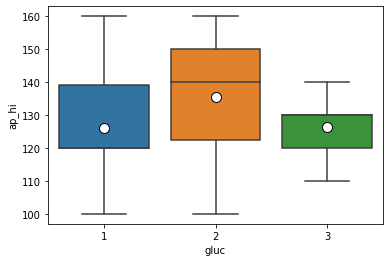

In [48]:
sns.boxplot(x="gluc", y="ap_hi", data=df, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

⭐Show the descriptive statistics of 3 groups.

In [49]:
df.groupby("gluc").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,440.0,126.115909,13.961148,100.0,120.0,120.0,139.25,160.0
2,26.0,135.576923,14.854422,100.0,122.5,140.0,150.00,160.0
3,34.0,126.470588,9.811049,110.0,120.0,130.0,130.00,140.0


In [51]:
#H0: ALL means are equal (mu1 = mu2 = mu3)
#H1: At least one mean is different

⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [50]:
stats.f_oneway(df[df["gluc"] == 1]["ap_hi"], df[df["gluc"] == 2]["ap_hi"], df[df["gluc"] == 3]["ap_hi"])

F_onewayResult(statistic=5.795657010932259, pvalue=0.0032499846334300775)

In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [55]:
multicomp = MultiComparison(df["ap_hi"], df["gluc"])

In [59]:
tukey = multicomp.tukeyhsd(alpha=0.05)

In [60]:
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2    9.461 0.0021   2.9271 15.9949   True
     1      3   0.3547 0.9885  -5.4079  6.1172  False
     2      3  -9.1063 0.0307 -17.5405 -0.6722   True
-----------------------------------------------------


## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

In [ ]:
# H0: The two categorical variables are independent
# H1: The two categorical variables are dependent

⭐Create a crosstab using Pandas.

In [63]:
ct = pd.crosstab(df.active, df.cardio)    # cross table çizdiriyor
ct

cardio,0,1
active,,
0,38,65
1,216,181


⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [64]:
stats.chi2_contingency(ct)

(9.349339017837064,
 0.0022306590435712988,
 1,
 array([[ 52.324,  50.676],
        [201.676, 195.324]]))

In [65]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [66]:
print("test statistic", chi)
print("p-values", p)

test statistic 9.349339017837064
p-values 0.0022306590435712988


In [67]:
dof

1

In [68]:
expected

array([[ 52.324,  50.676],
       [201.676, 195.324]])

In [69]:
chi

9.349339017837064

In [70]:
p

0.0022306590435712988

⭐Conduct chi-square test to see if there is a relationship between cholesterol and cardio

In [71]:
ct = pd.crosstab(df.cholesterol, df.cardio)
ct

cardio,0,1
cholesterol,,
1,219,155
2,21,47
3,14,44


In [72]:
stats.chi2_contingency(ct)

(36.29158015217154,
 1.3163867436285441e-08,
 2,
 array([[189.992, 184.008],
        [ 34.544,  33.456],
        [ 29.464,  28.536]]))

In [73]:
print("test statistic", chi)
print("p-values", p)

test statistic 9.349339017837064
p-values 0.0022306590435712988


In [ ]:
# There is statistically significant relationship betweeen cholesterol and cardio

In [74]:
df.to_csv("cardio1.csv")